<a href="https://colab.research.google.com/github/LucasTCook/Tensorflow_Introduction_Course/blob/master/01_neural_network_regression_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # Introduction to Regression with Neural Networks in TensorFlow

 There are many definitions for a regression problem, but in our case we are going to simplify it. Predicting a numerical variable based on some other combination of variables. Or predicting a number.

In [2]:
# Import Tensorflow
import tensorflow as tf
print(tf.__version__)

2.14.0


### Creating some data to view and fit

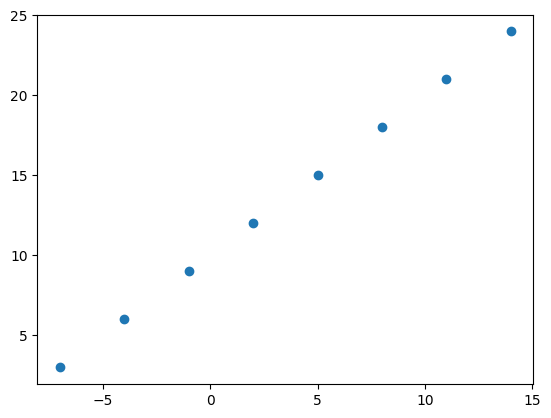

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Create the features
X = np.array([-7.,-4., -1., 2., 5., 8.,11., 14.])

# Create labels
y = np.array([3.,6.,9.,12.,15.,18.,21.,24.])

# Visualize
plt.scatter(X,y)

In [4]:
X + 10

array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])

In [5]:
# This is the relationship we want our NN to learn
# X is independent, y is dependant
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

### Input and Output shapes

In [6]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom","bathroom", "garage"])
house_price = tf.constant([939700])
house_info,house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [7]:
input_shape = X.shape
output_shape = y.shape

input_shape, output_shape

((8,), (8,))

In [8]:
X[0], y[0]

(-7.0, 3.0)

In [9]:
X[1], y[1]

(-4.0, 6.0)

In [10]:
# Rank 0 tensor (scalar) has 0 dimensions

input_shape = X[0].shape
output_shape = y[0].shape

input_shape, output_shape

((), ())

In [11]:
X[0].ndim

0

In [12]:
y[0].ndim

0

In [13]:
# Turn our NumPy arrays into tensors
X = tf.constant(X)
y= tf.constant(y)

X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [14]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape,out

NameError: ignored

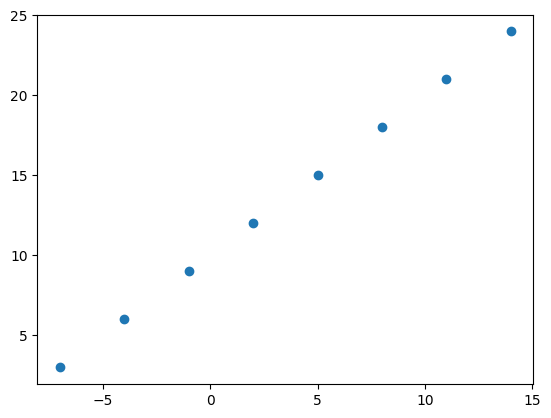

In [15]:
plt.scatter(X,y)

## Steps in modelling with TensorFlow

1. **Creating a model** - define the input and output layers as well as hidden layers in a depe learning model
2. **Compiling a model** - define the loss funtion (How wrong is the output) and the optimizer (how to improve) and evaluation metrics (what we can use to interpret the performance of our model).
3. **Fitting a model** - letting the model try to find patterns between X and y (features and labels)


In [16]:
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [17]:
tf.expand_dims(X, axis=-1)

<tf.Tensor: shape=(8, 1), dtype=float64, numpy=
array([[-7.],
       [-4.],
       [-1.],
       [ 2.],
       [ 5.],
       [ 8.],
       [11.],
       [14.]])>

In [18]:
# import keras

# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mae = mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # SGD is short for stochastic gradient descent
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 2s 2s/step - loss: 18.4037 - mae: 18.4037
Epoch 2/5
1/1 [==============================] - 0s 31ms/step - loss: 18.1225 - mae: 18.1225
Epoch 3/5
1/1 [==============================] - 0s 24ms/step - loss: 17.8412 - mae: 17.8412
Epoch 4/5
1/1 [==============================] - 0s 20ms/step - loss: 17.5600 - mae: 17.5600
Epoch 5/5
1/1 [==============================] - 0s 16ms/step - loss: 17.2787 - mae: 17.2787


In [19]:
# Check out X and y
X,y


(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [20]:
# Try and make a prediction using our model
y_pred = model.predict([17.])
y_pred

1/1 [==============================] - 0s 230ms/step


array([[-13.807367]], dtype=float32)

In [21]:
# even with adding our loss the predition is not close to the expected value of 27
y_pred + 16.7487

array([[2.9413319]], dtype=float32)

### Improving our model

We can improve our model by altering our steps we used to create the model

1. **Create a model** - Here we might add more layers, increase the number of hidden units (neurons) within each of the hidden layers, change the activation function of each layer
2. **Compiling a model** - Here we might change the optimization function or perhaps the **learning rate** of the optimization function.
3. **Fitting a model** - Here we might fit a model for more epochs (train it for longer) or on more data (give the model more examples to learn from)

In [22]:
# Lets rebuild our model

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mae = mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # SGD is short for stochastic gradient descent
              metrics=["mae"])

# 3. Fit the model (This time we will train for longer)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 338ms/step - loss: 12.4824 - mae: 12.4824
Epoch 2/100
1/1 [==============================] - 0s 8ms/step - loss: 12.3499 - mae: 12.3499
Epoch 3/100
1/1 [==============================] - 0s 7ms/step - loss: 12.2174 - mae: 12.2174
Epoch 4/100
1/1 [==============================] - 0s 7ms/step - loss: 12.0849 - mae: 12.0849
Epoch 5/100
1/1 [==============================] - 0s 18ms/step - loss: 11.9524 - mae: 11.9524
Epoch 6/100
1/1 [==============================] - 0s 10ms/step - loss: 11.8199 - mae: 11.8199
Epoch 7/100
1/1 [==============================] - 0s 11ms/step - loss: 11.6874 - mae: 11.6874
Epoch 8/100
1/1 [==============================] - 0s 8ms/step - loss: 11.5549 - mae: 11.5549
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 11.4224 - mae: 11.4224
Epoch 10/100
1/1 [==============================] - 0s 10ms/step - loss: 11.2899 - mae: 11.2899
Epoch 11/100
1/1 [==============================] - 

In [23]:
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [24]:
# Try and make a prediction using our model
y_pred = model.predict([17.])
y_pred

1/1 [==============================] - 0s 79ms/step


array([[29.592684]], dtype=float32)

In [25]:
X = tf.expand_dims(X, axis=-1)
X

<tf.Tensor: shape=(8, 1), dtype=float64, numpy=
array([[-7.],
       [-4.],
       [-1.],
       [ 2.],
       [ 5.],
       [ 8.],
       [11.],
       [14.]])>

In [26]:
# Lets rebuild our model with an additional hidden layer

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None), # adding this hidden layer with 100 hidden units
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss="mae", # mae = mean absolute error
              optimizer=tf.keras.optimizers.Adam(lr=0.001), # Change the optimizer and lower the raise rate from default .001
              metrics=["mae"])

# 3. Fit the model (This time we will train for longer)
model.fit(X, y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 571ms/step - loss: 13.0808 - mae: 13.0808
Epoch 2/100
1/1 [==============================] - 0s 11ms/step - loss: 13.0115 - mae: 13.0115
Epoch 3/100
1/1 [==============================] - 0s 11ms/step - loss: 12.9421 - mae: 12.9421
Epoch 4/100
1/1 [==============================] - 0s 10ms/step - loss: 12.8728 - mae: 12.8728
Epoch 5/100
1/1 [==============================] - 0s 8ms/step - loss: 12.8033 - mae: 12.8033
Epoch 6/100
1/1 [==============================] - 0s 11ms/step - loss: 12.7339 - mae: 12.7339
Epoch 7/100
1/1 [==============================] - 0s 11ms/step - loss: 12.6644 - mae: 12.6644
Epoch 8/100
1/1 [==============================] - 0s 11ms/step - loss: 12.5949 - mae: 12.5949
Epoch 9/100
1/1 [==============================] - 0s 9ms/step - loss: 12.5253 - mae: 12.5253
Epoch 10/100
1/1 [==============================] - 0s 9ms/step - loss: 12.4557 - mae: 12.4557
Epoch 11/100
1/1 [==============================] -

In [27]:
# Try and make a prediction using our model
y_pred = model.predict([17])
y_pred

1/1 [==============================] - 0s 65ms/step


array([[31.975395]], dtype=float32)

### Evaluating a model

In practive a typical workflow when building neural networks

```
Build a Model -> fit -> evaluate -> tweak a model -> fit -> evaluate -> tweak a model ...
```

When evaluating:
> "Visualize, Visualize, Visualize"

* The data - what are we working with? What does it look like
* The model - what does our model look like?
* The training - How does the model perform during training
* The predictions - How do the predictions of a model line up against the ground truth

In [28]:
# Make a bigger dataset
X = tf.range(-100,100,4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [29]:
# Make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

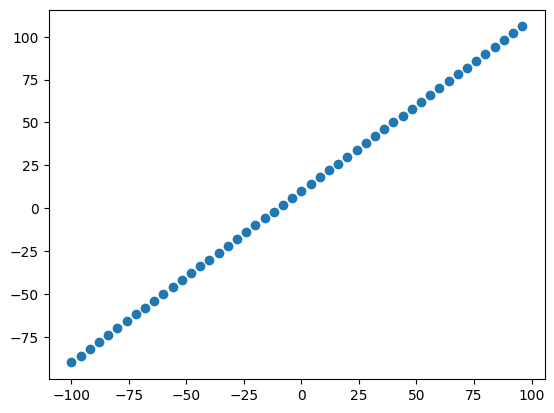

In [30]:
# Visualize the data
import matplotlib.pyplot as plt

plt.scatter(X,y)

### The 3 sets...

* **Training set** - the model learns from this data 70-80% of the total data available
* **Validation set** - the model gets tuned on this data 10-15% of the total data available
* **Test set** - the model gets evaluated on this data to test what it has learned 10-15% of the total data available

In [31]:
# Check the length of how many samples we have

len(X)

50

In [32]:
# Split the data into Train and Test sets
X_train = X[:40] # The first 40 to be training samples (80%)
y_train = y[:40]

X_test = X[40:] # last 10 are testing samples (20%)
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

### Visualizing the data sets

Now we have the data in training and test sets... lets visualize

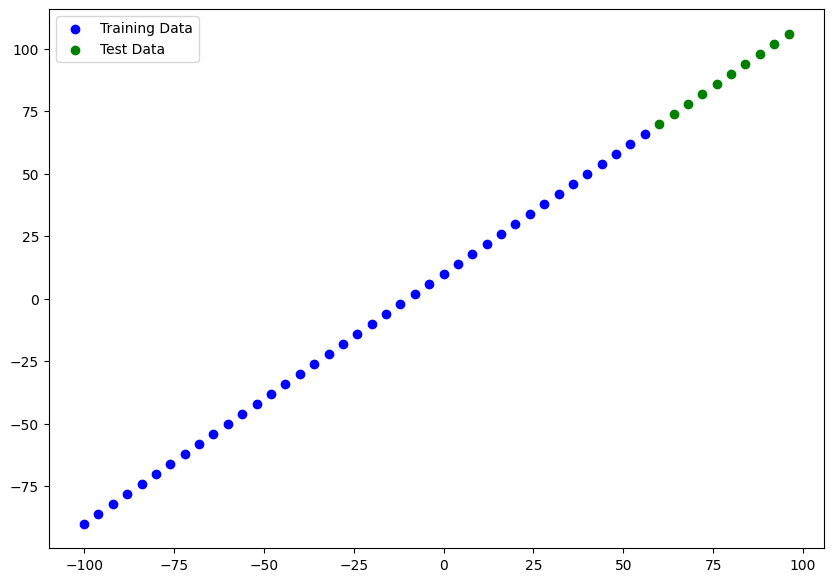

In [33]:
plt.figure(figsize=(10,7))

#Plot training in red
plt.scatter(X_train, y_train, c="b", label="Training Data")

#Plot training in blue
plt.scatter(X_test, y_test, c="g", label="Test Data")

# Show a legend
plt.legend();

In [37]:
# Lets build a neural network for our data

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss="mae", # mae = mean absolute error
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# # 3. Fit the model (This time we will train for longer)
# model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

### Visualizing the model

In [38]:
model.summary()

ValueError: ignored

In [39]:
# lets create a model which build autimatically by defining the input shape argument in the first layer

tf.random.set_seed(42)

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1]) # input_shape = [1] because we are only passing one number
])

# 2. Compile the model
model.compile(loss="mae",
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

In [40]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [41]:
# Dense = Fully connected hidden layer

* Total params - Total number of parameters in the model.
* Trainable params - Parameters (patterns) the model can update as it trains
* Non-Trainable params - Frozen patterns that we no longer want to train (typical when you bring in already learned patterns or params from other models during *transfer-learning*


**Resource:**  MIT's into to Deep Learning https://www.youtube.com/watch?v=QDX-1M5Nj7s&list=PLtBw6njQRU-rwp5__7C0oIVt26ZgjG9NI&index=2

In [42]:
# Modifying the number of units in a Dense layer to analyze the Trainable params

tf.random.set_seed(42)

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1]) # input_shape = [1] because we are only passing one number
])

# 2. Compile the model
model.compile(loss="mae",
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 10)                20        
                                                                 
Total params: 20 (80.00 Byte)
Trainable params: 20 (80.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [166]:
# Modifying the number of units in a Dense layer to analyze the Trainable params

tf.random.set_seed(42)

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, input_shape=[1], name="layer1"), # input_shape = [1] because we are only passing one number
    tf.keras.layers.Dense(100, input_shape=[1], name="layer2"),
    tf.keras.layers.Dense(1, input_shape=[1], name="layer3")
], name="nameOfModel")

# 2. Compile the model
model.compile(loss="mae",
              optimizer=tf.keras.optimizers.Adam(lr="0.01"),
              metrics=["mae"])

model.summary()

Model: "nameOfModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 100)               200       
                                                                 
 layer2 (Dense)              (None, 100)               10100     
                                                                 
 layer3 (Dense)              (None, 1)                 101       
                                                                 
Total params: 10401 (40.63 KB)
Trainable params: 10401 (40.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


*It seems like the number of trainable parameters is equal to 2 * the number of units in the Dense layer (2 trainable layers per hidden unit)*

In [167]:
# Lets fit our model to the training data

# 3. Fit the model (This time we will train for longer)
model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=200, verbose=0)

In [168]:
# Get a summary of our model
model.summary()

Model: "nameOfModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 100)               200       
                                                                 
 layer2 (Dense)              (None, 100)               10100     
                                                                 
 layer3 (Dense)              (None, 1)                 101       
                                                                 
Total params: 10401 (40.63 KB)
Trainable params: 10401 (40.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


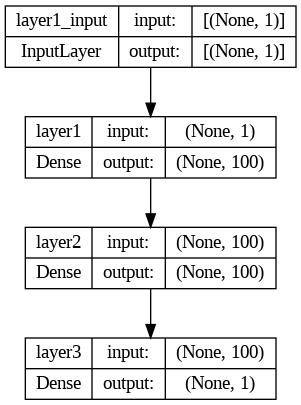

In [169]:
plot_model(model, show_shapes=True)

### Visualizing Predictions

To visualize predictions it is a good idea to plot them against the ground truth labels.

Often you'll see this in the form of `y_test` or `y_true` versus `y_pred`

In [170]:
# Make Some predictions
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 55ms/step


array([[ 70.47231 ],
       [ 74.51028 ],
       [ 78.54823 ],
       [ 82.58618 ],
       [ 86.62414 ],
       [ 90.6621  ],
       [ 94.70006 ],
       [ 98.738014],
       [102.77597 ],
       [106.81391 ]], dtype=float32)

In [171]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

**If you feel like you are going to reuse functionality, turn it into a function**

In [172]:
# Lets create a plotting function
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
  """
  Plots training data, test data and compares predictions to ground truth
  """
  plt.figure(figsize=(10,7))

  #Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training Data")

  #Plot testing data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing Data")

  #Plot model's predictions in red
  plt.scatter(test_data, predictions, c="r", label="Predictions")

  # Show the legend
  plt.legend()

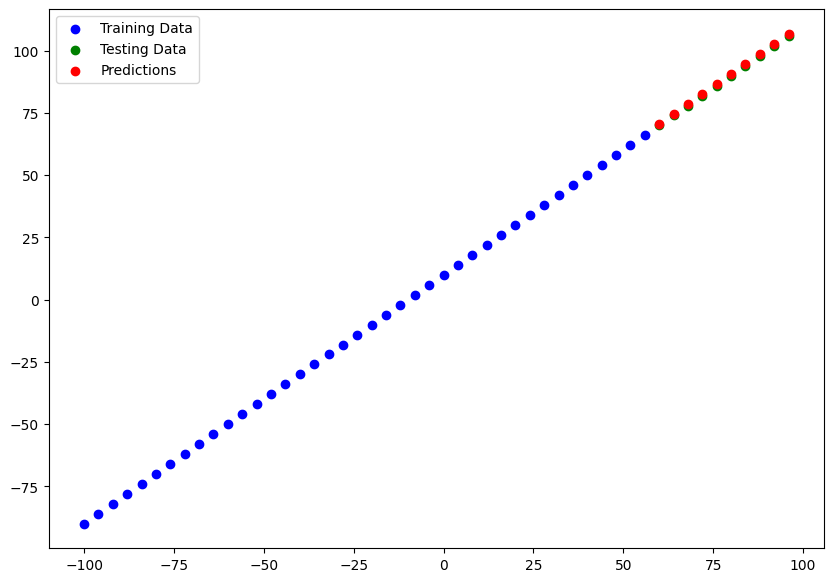

In [173]:
plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_pred)

### Evaluating our model's predictions with regression evaluation matrics

Depending on the problem you're working on, there will be different evaluation metrics to evaluate your model's performance.

Since we are working on a regression problem, two of the main metrics:
* MAE - mean absolute error (on avg, how wrong is each of my model's predictions)
* MSE - mean square error, "square the average errors"

In [174]:
# Evaluate the model on the test
model.evaluate(X_test, y_test)

1/1 [==============================] - 1s 544ms/step - loss: 0.6431 - mae: 0.6431


[0.6431190371513367, 0.6431190371513367]

In [183]:
tf.constant(y_pred)

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[ 70.47231 ],
       [ 74.51028 ],
       [ 78.54823 ],
       [ 82.58618 ],
       [ 86.62414 ],
       [ 90.6621  ],
       [ 94.70006 ],
       [ 98.738014],
       [102.77597 ],
       [106.81391 ]], dtype=float32)>

In [176]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

**The `y_test` and `y_pred` are not the same shape!!!!**

In [177]:
# Calculate the Mean absolute error

In [182]:
mae = tf.keras.losses.MAE(y_true=y_test,y_pred=y_pred)
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([17.62215 , 14.493834, 12.180707, 10.682764, 10.      , 10.132421,
       11.080023, 12.842809, 15.420776, 18.813911], dtype=float32)>

In [184]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 70.47231 ,  74.51028 ,  78.54823 ,  82.58618 ,  86.62414 ,
        90.6621  ,  94.70006 ,  98.738014, 102.77597 , 106.81391 ],
      dtype=float32)>

**We need to squeeze `y_pred` to make it the same shape as `y_test`**

In [186]:
# Calculate the mean absolute error
mae = tf.keras.losses.MAE(y_true=y_test,y_pred=tf.squeeze(y_pred))
mae


<tf.Tensor: shape=(), dtype=float32, numpy=0.6431198>

In [187]:
# Evaluate the model on the test
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 30ms/step - loss: 0.6431 - mae: 0.6431


[0.6431190371513367, 0.6431190371513367]

**The results are now the same**

In [191]:
# Calculate the mean square error
mse = tf.keras.losses.MSE(y_true=y_test,
                          y_pred=tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=0.42548853>

In [260]:
# Create a reusable function for MAE and MSE
def mae(y_true, y_pred):
  return tf.keras.losses.MAE(y_true=y_test,
                             y_pred=tf.squeeze(y_pred)).numpy()

def mse(y_true,y_pred):
  return tf.keras.losses.MSE(y_true=y_true,
                             y_pred=tf.squeeze(y_pred)).numpy()

### Running experiments to improve our model

```
"Experiment,Experiment,Experiment"
```

1. Get more data - more examples for the model to train on (more opportunities to learn patterns)
2. Make our model larger (using a more complex model) - more layers or more hidden units in each layer
3. Train for longer -  give your model more of a chance to find patterns in the data

Lets do 3 modelling experiments
1. `Model 1:` Same as original model, 1 layer, but trained 100 epochs
2. `Model 2`: 2 layers, trained for 100 epochs
3. `Model 3:` 2 layers, trained for 500 epochs

**Build Model 1**

1 layer, but trained 100 epochs

In [261]:
# Set random seed
tf.random.set_seed(42)

#1. Create Model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#2 Compile your model
model_1.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

#3. Fit the model
model_1.fit(tf.expand_dims(X_train,-1),y_train,epochs=100,verbose=0)

1/1 [==============================] - 0s 44ms/step


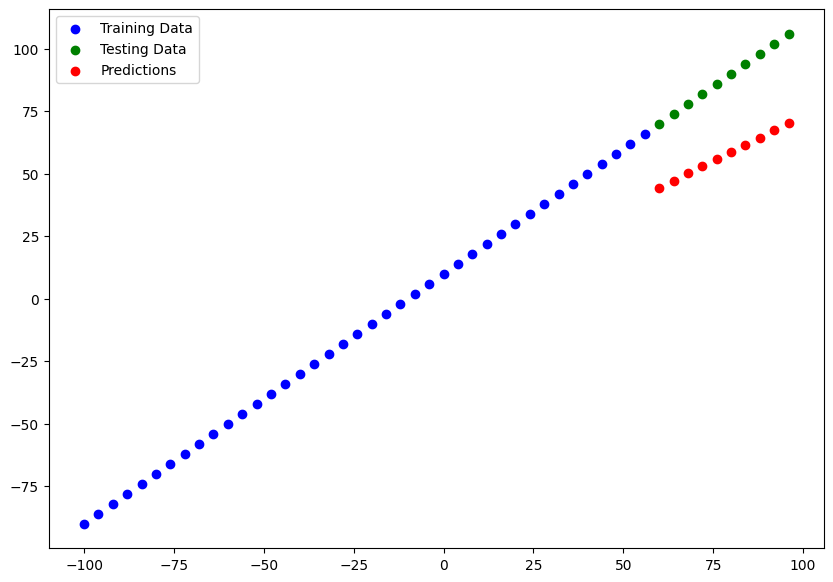

In [262]:
# Make and plot predictions for model_1
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [263]:
# Calculate evaluiation metrics for model_1
mae_1 = mae(y_test,y_preds_1)
mse_1 = mse(y_test,y_preds_1)

mae_1,mse_1

(30.70893, 953.53955)

**Build Model 2**

2 layer, but trained 100 epochs

In [264]:
# Set random seed
tf.random.set_seed(42)

#1. Create Model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

#2 Compile your model
model_2.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

#3. Fit the model
model_2.fit(tf.expand_dims(X_train,-1),y_train,epochs=100,verbose=0)

1/1 [==============================] - 0s 52ms/step


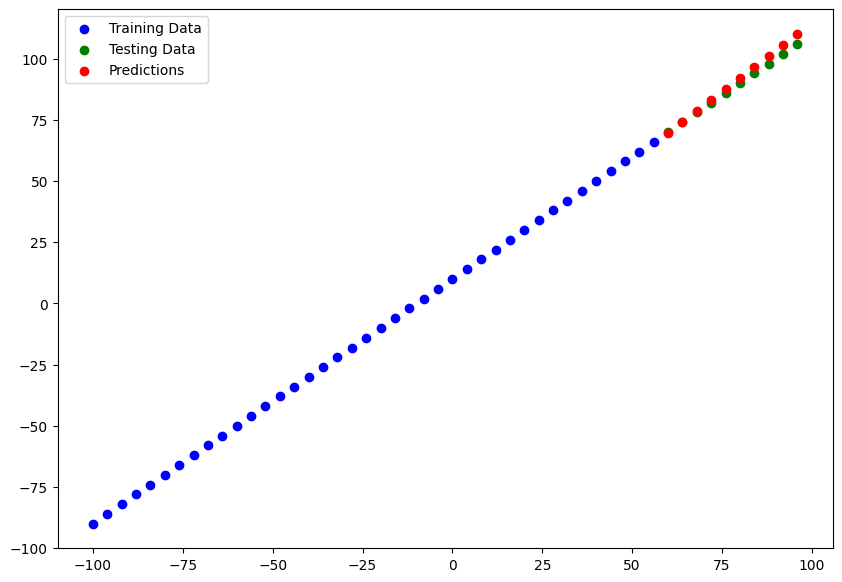

In [265]:
# Make and plot predictions for model_2
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [266]:
# Calculate evaluiation metrics for model_2
mae_2 = mae(y_test,y_preds_2)
mse_2 = mse(y_test,y_preds_2)

mae_2,mse_2

(1.9265251, 5.5421343)

**Build Model 3**

2 layers, trained for 500 epochs

In [267]:
tf.random.set_seed(42)

# 1. Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
model_3.fit(tf.expand_dims(X_train,axis=-1),y_train,epochs=500, verbose=0)

1/1 [==============================] - 0s 56ms/step


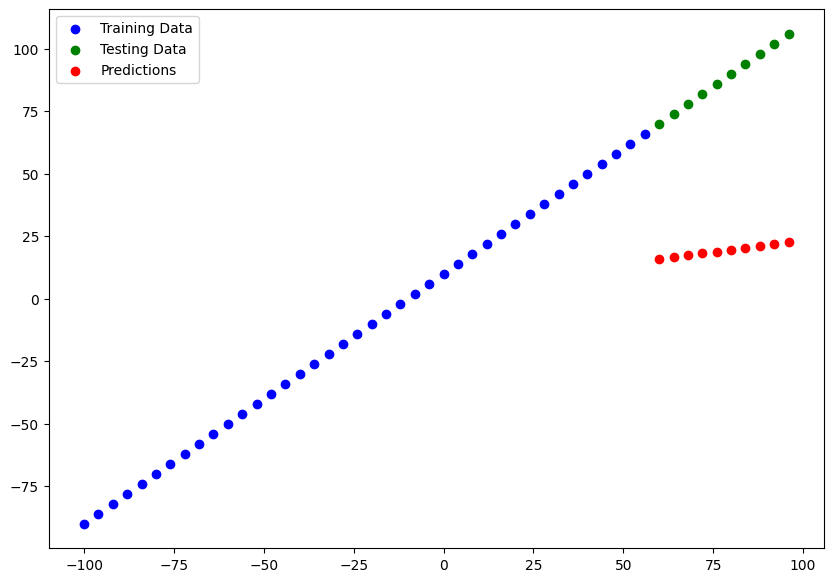

In [268]:
# Make predictions on model 3
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

In [269]:
# Calculate evaluiation metrics for model_3
mae_3 = mae(y_test,y_preds_3)
mse_3 = mse(y_test,y_preds_3)

mae_3,mse_3

(68.74385, 4812.254)

**OVERFIT THE MODEL**

## Comparing the results of our expiriments

In [270]:
# Let's compare our model's results using a pandas DataFrame
import pandas as pd

model_results = [["model_1", mae_1, mse_1],
                 ["model_2", mae_2, mse_2],
                 ["model_3", mae_3, mse_3]]

all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,30.708929,953.539551
1,model_2,1.926525,5.542134
2,model_3,68.743851,4812.253906


**Looks like Model_2 ran the best**

In [271]:
model_2.summary()

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_42 (Dense)            (None, 10)                20        
                                                                 
 dense_43 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Tracking your expiriments

One really good habit is to track the results of your expiriments. And when doing so it can be tedious when running lots of expiriments. Luckily there are tools to help us

**Resource:** As you build more models, you'll want to look into using:
* TensorBoard - a component of the TensorFlow library to help track the modelling experiments
* Weights & Biases - a tool for tracking all kinds of ML experiments


## Saving our Models